<a href="https://colab.research.google.com/github/Vivardhan02/mL_Project/blob/main/Part_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part - 4**

---



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import os

# Loading and exploring data

In [3]:
curr_dir = os.getcwd()
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
# use Lable encoder to convert the columns with textual data into numerical/int data by assinging each type of text with a number
# can be done manually by making a dict for each column with textual data and assing the keys as numbers.
label_encoder = LabelEncoder()
df['Attrition_Numeric'] = label_encoder.fit_transform(df['Attrition'])

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Attrition')
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [7]:
X = df.drop(['Attrition', 'Attrition_Numeric', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
Y = df['Attrition_Numeric']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [8]:
leave_probabilities = model.predict_proba(X_test)[:, 1]
stay_probabilities = 1 - leave_probabilities

results = X_test.copy()
results['Probability_Stay'] = stay_probabilities
results['Likely_to_Stay'] = results['Probability_Stay'] > 0.6

In [9]:
likely_to_stay = results[results['Likely_to_Stay'] == True]
print(f"Number of employees likely to stay: {len(likely_to_stay)}")

Number of employees likely to stay: 275


# Visualising Age vs Probability of Staying


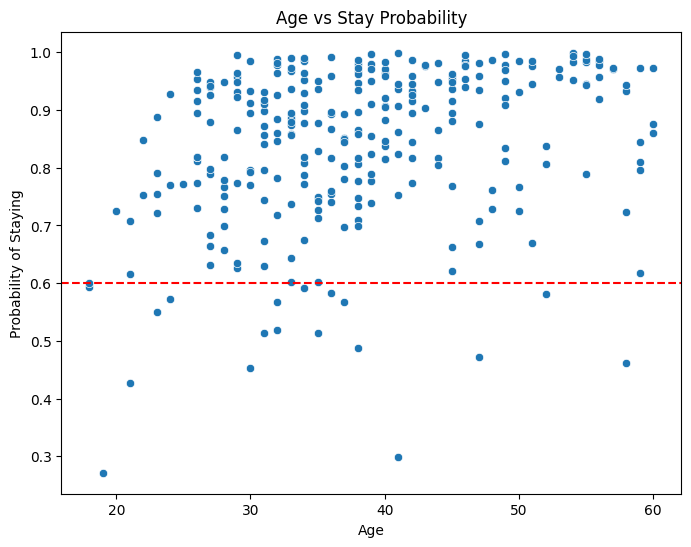

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Probability_Stay', data=results)
plt.axhline(y=0.6, color='red', linestyle='--')
plt.title('Age vs Stay Probability')
plt.xlabel('Age')
plt.ylabel('Probability of Staying')
plt.show()

# Visualising Stay vs Leave Proportion

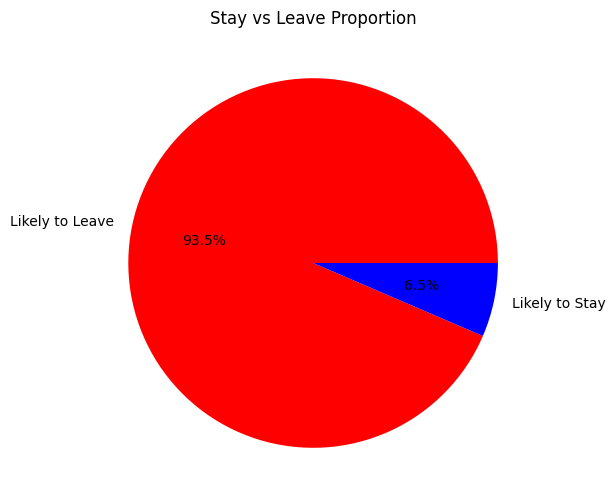

In [11]:
plt.figure(figsize=(8, 6))
stay_counts = results['Likely_to_Stay'].value_counts()
labels = ['Likely to Leave', 'Likely to Stay']
colors = ['red', 'blue']
plt.pie(stay_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Stay vs Leave Proportion')
plt.show()

# Performing Evaluation metrics

In [12]:
# Converting probability predictions to binary predictions using our threshold
y_pred = (results['Probability_Stay'] > 0.6).astype(int)
y_pred = 1 - y_pred

# Calculating accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Generating confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print('\n')
print('\n')

# Generating classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=['Stay', 'Leave']))
print(f"Number of employees likely to stay: {len(likely_to_stay)}")

Model Accuracy: 0.88

Confusion Matrix:
[[247   6]
 [ 28  13]]





Classification Report:
              precision    recall  f1-score   support

        Stay       0.90      0.98      0.94       253
       Leave       0.68      0.32      0.43        41

    accuracy                           0.88       294
   macro avg       0.79      0.65      0.68       294
weighted avg       0.87      0.88      0.87       294

Number of employees likely to stay: 275


In [13]:


# 1. Simple Fixed Growth (example: 8% growth)
df["FutureSalary_fixed"] = df["MonthlyIncome"] * 1.08

# 2. Performance-based Growth
def increment(x):
    if x == 4:
        return 1.10
    else:
        return 1.05

df["Increment"] = df["PerformanceRating"].apply(increment)
df["FutureSalary_perf_based"] = df["MonthlyIncome"] * df["Increment"]

# View sample
df[["MonthlyIncome", "PerformanceRating", "FutureSalary_fixed", "FutureSalary_perf_based"]].head()


,MonthlyIncome,PerformanceRating,FutureSalary_fixed,FutureSalary_perf_based
0,5993,3,6472.44,6292.65
1,5130,4,5540.40,5643.00
2,2090,3,2257.20,2194.50
3,2909,3,3141.72,3054.45
4,3468,3,3745.44,3641.40


# **Part - 5**

---



In [14]:
# Ensure stay_probabilities is a pandas Series with the same index
df["P_stay"] = model.predict_proba(df[X_train.columns])[:, 1]
df["P_leave"] = 1 - df["P_stay"]

# Now compute expected loss
df["ExpectedLoss"] = df["P_leave"] * df["FutureSalary_fixed"]
df["likely_to_stay_loss"] = df["P_stay"] * df["FutureSalary_fixed"]



# Total expected loss
total_loss = df["ExpectedLoss"].sum()
total_stay_loss = df["likely_to_stay_loss"].sum()
print("Total Expected Salary Loss due to Attrition:", total_loss)
print("Total Expected Salary Loss due to Stay:", total_stay_loss)


Total Expected Salary Loss due to Attrition: 9089929.49424296
Total Expected Salary Loss due to Stay: 1234124.2257570396
